In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset_train=pd.read_csv('/content/Google_Stock_Price_Train.csv')

In [ ]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
training_set = dataset_train.iloc[:, 1:3].values #displaying the col 'open', col 'high' using the slice operator. iloc[:,]-denoted all rows, iloc[:,1:3] where 1:3- 2nd and 3rd cols; ".values" - to print the data into an array instead of dataframe

In [ ]:
training_set

array([[325.25, 332.83],
       [331.27, 333.87],
       [329.83, 330.75],
       ...,
       [793.7 , 794.23],
       [783.33, 785.93],
       [782.75, 782.78]])

In [ ]:
training_set = dataset_train.iloc[:, 1:2].values #taking one coluns, based on it we are gonna predict

In [ ]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
x_train=[]
y_train=[]

In [ ]:
#assiging x_train & y_train
for i in range(60,1258): #1258 = total no of rows
  x_train.append(training_set_scaled[i-60:i,0]) #i=60; i-60== 60-60 i.e., 0 to 60 'i-60:i' == 0th row to 60th row; '0' == 1st col. #1st 60 data is given into x_train
  y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshaping = addition of dimension to the numpy array
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
regressor=Sequential()

In [ ]:
from keras.layers import Dense, LSTM

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))

In [ ]:
regressor.add(Dropout(0.2))

In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import Callback

In [ ]:
regressor.add(LSTM(units=50, return_sequences = False, input_shape=(x_train.shape[1],1)))
regressor.add(Dense(32,activation='relu'))
regressor.add(Dense(1))

In [ ]:
regressor.compile(loss='mean_squared_error',optimizer=RMSprop(),metrics=['mse'])

In [ ]:
regressor.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
38/38 [==============================] - 9s 60ms/step - loss: 0.0211 - mse: 0.0211
Epoch 2/20
38/38 [==============================] - 2s 54ms/step - loss: 0.0051 - mse: 0.0051
Epoch 3/20
38/38 [==============================] - 2s 56ms/step - loss: 0.0040 - mse: 0.0040
Epoch 4/20
38/38 [==============================] - 2s 54ms/step - loss: 0.0036 - mse: 0.0036
Epoch 5/20
38/38 [==============================] - 2s 55ms/step - loss: 0.0034 - mse: 0.0034
Epoch 6/20
38/38 [==============================] - 3s 84ms/step - loss: 0.0032 - mse: 0.0032
Epoch 7/20
38/38 [==============================] - 2s 54ms/step - loss: 0.0030 - mse: 0.0030
Epoch 8/20
38/38 [==============================] - 2s 55ms/step - loss: 0.0026 - mse: 0.0026
Epoch 9/20
38/38 [==============================] - 2s 54ms/step - loss: 0.0023 - mse: 0.0023
Epoch 10/20
38/38 [==============================] - 2s 54ms/step - loss: 0.0027 - mse: 0.0027
Epoch 11/20
38/38 [==============================] - 3s 70m

In [ ]:
#predictions
dataset_test=pd.read_csv('/content/Google_Stock_Price_Train.csv')

In [ ]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [ ]:
#prediction of stock price - 2018
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [ ]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,227):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

6/6 [==============================] - 1s 23ms/step


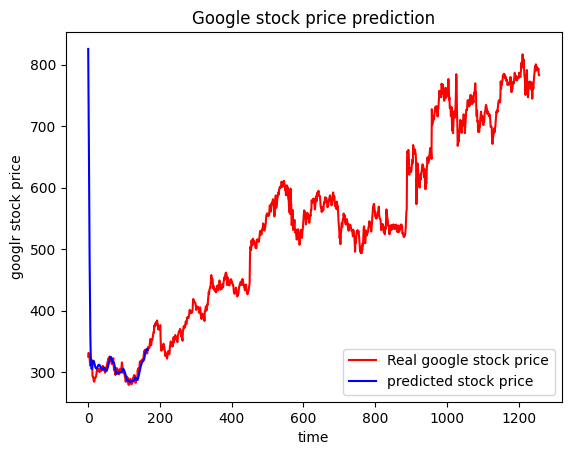

In [ ]:
#visualisation
plt.plot(real_stock_price, color = 'red', label='Real google stock price')
plt.plot(predicted_stock_price, color = 'blue', label = 'predicted stock price')
plt.title('Google stock price prediction')
plt.xlabel('time')
plt.ylabel('googlr stock price')
plt.legend()
plt.show()